In [344]:
import numpy as np
import cPickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import random

In [30]:
data = cPickle.load(open('/mnt/fs1/chengxuz/instance_features.pkl', 'r'))

In [223]:
data.keys()

['val_output', 'val_label', 'label_list', 'memory_bank', 'all_labels']

In [224]:
data['val_output'].shape

(50000, 128)

In [319]:
data['all_labels'].shape

(1281167,)

In [108]:
#returns list of mean vectors
def compute_training_means(data):
        class_mean_list = []
        u, indices = np.unique(data['all_labels'],return_index=True)
        for i in range(u.shape[0]-1):
                category_mean = np.mean(data['memory_bank'][indices[i]:indices[i+1]],axis=0)
                category_mean = category_mean.reshape((128,1))
                #category_mean.reshape((128,1))
                class_mean_list.append(category_mean)
        class_mean_list.append(np.mean(data['memory_bank'][indices[999]:],axis=0))
        return class_mean_list

In [109]:
a, indx = np.unique(data['all_labels'],return_index=True)
indx[998]

1278567

In [110]:
training_means = compute_training_means(data)
print(len(training_means))
#print(training_means[1].T)

1000


In [101]:
#accuracy on validation set
def check_val_accuracy(data):
        same_class = 0
        for i in range(data['val_label'].shape[0]):
                most_sim_indx = np.argmax( np.dot( data['memory_bank'], data['val_output'][i].reshape(128,1)))
                if data['val_label'][i] == data['all_labels'][most_sim_indx]:
                        same_class +=1
        return same_class

In [102]:
val_accuracy = check_val_accuracy(data)
print(val_accuracy)
#seems slow

15402


In [103]:
#Accuracy on validation set:
15402/50000.

0.30804

In [111]:
u, indices = np.unique(data['all_labels'],return_index=True)
data['memory_bank'][indices[888]:indices[889]].shape


(1300, 128)

In [112]:
#collect similarities between classes

def similarity_within_class(data,means_list):
    #list of arrays of similarities within each class
    class_similarity_list = []
    u, indices = np.unique(data['all_labels'],return_index=True)
    for i in range(len(indices)-1):
        class_similarity = np.dot(data['memory_bank'][indices[i]:indices[i+1]],means_list[i])
        class_similarity = class_similarity.reshape((class_similarity.shape[0],))
        class_similarity_list.append(class_similarity)
    
    #handling the last one
    last_class_similarity = np.dot(data['memory_bank'][indices[999]:],means_list[999])
    last_class_similarity = last_class_similarity.reshape((last_class_similarity.shape[0],))
    class_similarity_list.append(last_class_similarity)
    
    return class_similarity_list

        
        
    
    

In [129]:
class_similarity_list = similarity_within_class(data,training_means)
class_similarity_list[0].shape
#len(class_similarity_list)

(1300,)

(array([  5.,   6.,  18.,  11.,  23.,  22.,  38.,  37.,  50.,  57.,  72.,
         78.,  88.,  90., 103.,  85.,  77.,  98.,  88.,  63.,  53.,  46.,
         31.,  20.,  18.,  12.,   6.,   4.,   0.,   1.]),
 array([-0.02858696, -0.02301735, -0.01744774, -0.01187813, -0.00630852,
        -0.00073891,  0.0048307 ,  0.01040031,  0.01596992,  0.02153953,
         0.02710914,  0.03267875,  0.03824836,  0.04381797,  0.04938758,
         0.05495719,  0.0605268 ,  0.06609641,  0.07166602,  0.07723563,
         0.08280525,  0.08837485,  0.09394447,  0.09951407,  0.10508368,
         0.1106533 ,  0.1162229 ,  0.12179252,  0.12736213,  0.13293174,
         0.13850135], dtype=float32),
 <a list of 30 Patch objects>)

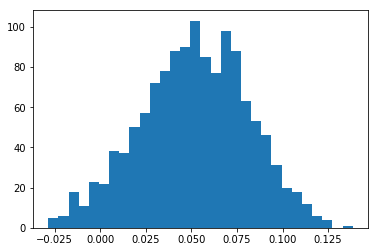

In [185]:
#plot histogram for class similarity in class zero

plt.hist(class_similarity_list[234],bins=30)



(array([  4.,  19.,  43.,  60., 104., 100., 123., 107.,  95.,  75.,  63.,
         60.,  36.,  30.,  22.,  12.,   9.,  12.,  10.,   2.,   4.,   3.,
          3.,   0.,   1.,   1.,   0.,   0.,   0.,   2.]),
 array([0.00959024, 0.0161985 , 0.02280676, 0.02941502, 0.03602328,
        0.04263154, 0.0492398 , 0.05584805, 0.06245631, 0.06906457,
        0.07567283, 0.08228109, 0.08888935, 0.0954976 , 0.10210586,
        0.10871412, 0.11532238, 0.12193064, 0.12853889, 0.13514715,
        0.14175542, 0.14836368, 0.15497193, 0.16158019, 0.16818845,
        0.1747967 , 0.18140496, 0.18801323, 0.19462149, 0.20122974,
        0.207838  ], dtype=float32),
 <a list of 30 Patch objects>)

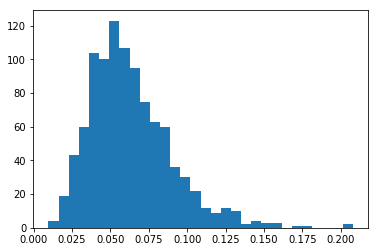

In [242]:
mean_class_list = []
for i in range(len(class_similarity_list)):
    mean_class_list.append(np.mean(class_similarity_list[i]))

plt.hist(mean_class_list,bins=30)

In [86]:
#confusion matrix

actual_indices = data['val_label']

training_means_matrix = np.zeros((1000,128))

for i in range(len(training_means)):
    training_means_matrix[i] = training_means[i].T

def find_predicted_indices(data):
    predicted_indices = np.zeros((data['val_label'].shape[0],))
    for i in range(data['val_label'].shape[0]):
        predicted_indices[i] = np.argmax(np.dot( training_means_matrix, data['val_output'][i]  ))
    
    return predicted_indices

predicted_indices = find_predicted_indices(data)

    

In [116]:
confusion_matrix = confusion_matrix(actual_indices,predicted_indices)

In [117]:
confusion_matrix

array([[29,  0,  0, ...,  0,  0,  0],
       [ 0, 10,  1, ...,  0,  0,  0],
       [ 0,  0, 19, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 10,  0,  0],
       [ 0,  0,  1, ...,  0,  5,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [118]:
np.trace(confusion_matrix)/50000.

0.20572

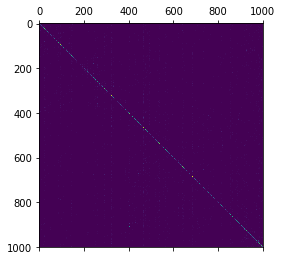

In [92]:
plt.matshow(confusion_matrix)

In [ ]:
#taken from https://www.kaggle.com/grfiv4/plot-a-confusion-matrix

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))

plot_confusion_matrix(confusion_matrix,np.arange(1000),normalize=False)

In [128]:
#compute pairwise correlation between images of a given class


[301 780]
301
[158 361]
158
[ 37 142]
37
[351 393]
351
[374 779]
374
[ 729 1107]
729
[ 831 1125]
831
[201 776]
201
[ 385 1077]
385
[559 760]
559


(array([4.000e+00, 5.000e+00, 1.400e+01, 3.500e+01, 4.600e+01, 6.900e+01,
        1.450e+02, 2.290e+02, 3.650e+02, 5.290e+02, 7.020e+02, 8.220e+02,
        1.076e+03, 1.260e+03, 1.351e+03, 1.470e+03, 1.432e+03, 1.400e+03,
        1.251e+03, 1.205e+03, 1.074e+03, 9.030e+02, 8.920e+02, 7.150e+02,
        5.690e+02, 4.730e+02, 4.170e+02, 3.680e+02, 2.470e+02, 2.480e+02,
        1.770e+02, 1.250e+02, 8.200e+01, 8.500e+01, 5.700e+01, 4.600e+01,
        2.900e+01, 2.300e+01, 1.700e+01, 1.900e+01, 8.000e+00, 6.000e+00,
        3.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([-3.0366832e-01, -2.8202173e-01, -2.6037514e-01, -2.3872854e-01,
        -2.1708193e-01, -1.9543535e-01, -1.7378876e-01, -1.5214215e-01,
        -1.3049556e-01, -1.0884897e-01, -8.7202370e-02, -6.5555774e-02,
        -4.3909181e-02, -2.2262584e-02, -6.1599014e-04,  2.1030605e-02,
         4.2677201e-02,  6.4323798e-02,  8.5970387e-02,  1.0761698e-01,
         1.29263

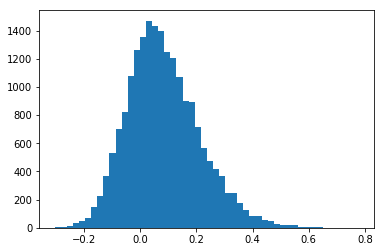

In [270]:
#classes and indices of the classes
classes, indices = np.unique(data['all_labels'],return_index=True)

#compute pairwise correlation within a given class

#collect all the vectors of a given category
category_vectors = data['memory_bank'][indices[130]:indices[131]]
#build list of pairs sampled from 

#source to generate nonrepeating pairs from a list: 
#https://www.quora.com/How-do-you-create-random-nonrepetitive-pairs-from-a-list-in-Python
def generate_pairs(sequence):
    
    used_pairs = set()
    
    #generate non-repeating pairs
    while True:
        pair = random.sample(sequence,2)
        pair = tuple(sorted(pair))
        if pair not in used_pairs:
            used_pairs.add(pair)
            yield np.array(pair)

sequence = np.arange(category_vectors.shape[0])
generator = generate_pairs(sequence)

for i in range(10):
    pair = generator.next()
    print(pair)
    print(pair[0])


#Generate list of pairwise dot products sampled uniformly from 1300 choose 2:

def pairwise_dot_products(category_vectors, sample_number):
    
    sequence = np.arange(category_vectors.shape[0])
    generator = generate_pairs(sequence)
    
    dot_products = []
    
    for i in range(sample_number):
        pair = generator.next()
        vector_1 = category_vectors[pair[0]]
        vector_2 = category_vectors[pair[1]]
        dot_product = np.dot(vector_1,vector_2)
        dot_products.append(dot_product)
    
    #histogram = plt.hist(dot_products, bins=40)
    
    return dot_products

plt.hist(pairwise_dot_products(category_vectors,20000),bins=50)
#plot_pairwise_dot_products(category_vectors,30000)

        
        
    
#looks like a poisson distribution
        
    
    

sampled categories: [364 385 754 280 159 785 125 954  32 565]
shape: (1300, 128)


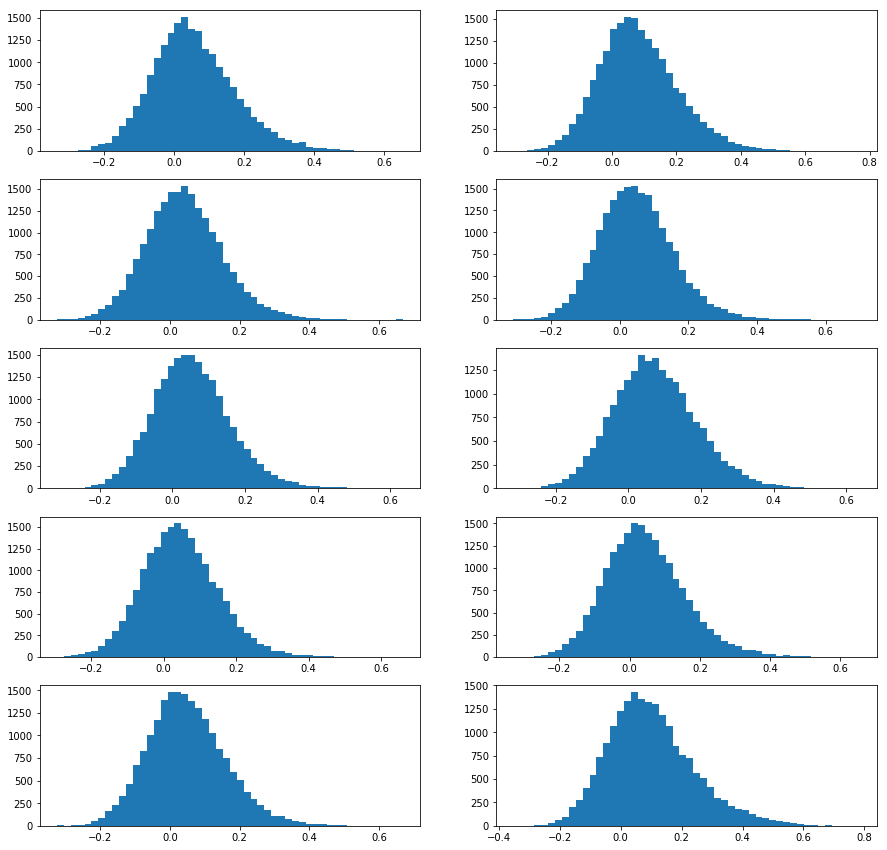

In [268]:
#plot pairwise distribution for multiple categories
classes, indices = np.unique(data['all_labels'],return_index=True)

category_vectors_list = []

#sample 10 categories uniformly from the 1000
sampled_categories = np.random.choice(1000,10)
print("sampled categories: " + str(sampled_categories))

for i in range(sampled_categories.shape[0]):
    if sampled_categories[i] != 999:
        category_vectors_list.append(data['memory_bank'][indices[sampled_categories[i]]:indices[sampled_categories[i]+1]])
    elif sampled_categories[i] == 999:
        category_vectors_list.append(data['memory_bank'])[indices[sampled_categories[i]]:]
        
print("shape: " + str(category_vectors_list[3].shape))
 
fig = plt.figure(figsize=(15,15))
#fig.subplots_adjust(hspace=0.3, wspace=0.4)
for i in range(1,len(category_vectors_list)+1):
    plt.subplot(5,2,i)
    plt.hist(pairwise_dot_products(category_vectors_list[i-1],20000),bins=50)



#looks poisson











In [298]:
#sample an image encoding from the training set
sample_index = np.random.choice(data['memory_bank'].shape[0],1)[0]
sample_vector = data['memory_bank'][sample_index]
sample_category = data['all_labels'][sample_index]

#pop sample_vector from memory bank
popped_mem_bank = np.delete(data['memory_bank'],sample_index,axis=0)

#compute dot product of sample_vector with popped_mem_bank
correlations = np.dot(popped_mem_bank,sample_vector)
print(correlations.shape)
print(np.mean(correlations))
print(np.std(correlations))



(1281166,)
-3.256211e-05
0.088295445


In [345]:
sample_index = np.random.choice(data['memory_bank'].shape[0],1)[0]
print("sample_index: " + str(sample_index))

def threshold_function(x,sample_index):
    #print(sample_index)
    sample_vector = data['memory_bank'][sample_index]
    sample_category = data['all_labels'][sample_index]
    #print(sample_category)
    popped_mem_bank = np.delete(data['memory_bank'],sample_index,axis=0)
    correlations = np.dot(popped_mem_bank,sample_vector)
    mask = correlations>x
    mask_threshold_indices = np.where(correlations > x)[0]
    #print(mask_threshold_indices)
    
    N_x = np.sum(mask)
    M_x = 0
    
    for i in range(mask_threshold_indices.shape[0]):
        index = mask_threshold_indices[i]
        if data['all_labels'][index] == sample_category:
            M_x += 1
    
    return N_x, M_x, float(M_x)/N_x

#_,_, ratio = threshold_function(0.03,sample_index)

x = np.linspace(0,0.1,11)
ratios = []
for i in range(x.shape[0]):
    #print(x[i])
    ratio = threshold_function(x[i],sample_index)
    ratios.append(ratio)

ratios




        
    
    
    

sample_index: 81355


[(640106, 583, 0.0009107866509609346),
 (581178, 523, 0.0008998964172766347),
 (522914, 466, 0.0008911599230466195),
 (466045, 421, 0.000903346243388514),
 (412239, 375, 0.0009096664798818161),
 (360513, 331, 0.0009181361005012302),
 (312659, 293, 0.0009371231917200528),
 (268895, 259, 0.0009632012495583778),
 (228645, 229, 0.0010015526252487481),
 (192814, 201, 0.0010424554233613742),
 (161048, 173, 0.0010742138989618003)]

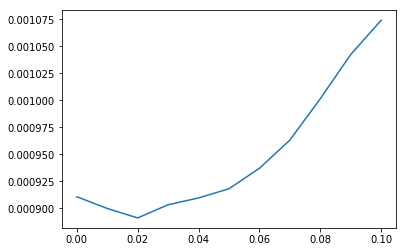

In [349]:
ratios_plot = []

for i in range(len(ratios)):
    ratios_plot.append(ratios[i][2])

x = np.linspace(0,0.1,11)

plt.plot(x,ratios_plot)

In [190]:
np.dot(np.array((3,4)),np.array((4,2)))



20

In [313]:
arr = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(arr)

arr_2 = np.array([5,6,2,1,171,8])
np.where(arr_2 > 5)[0]


[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


array([1, 4, 5])